In [1]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\AB006HT\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AB006HT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import os
os.chdir('C:\\Users\\AB006HT\\Python training\\NLP Python for Beginners\\NPS verbatim analysis')

In [3]:
# first, we import the relevant modules from the NLTK library
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [4]:
# next, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()

In [5]:
# the variable 'message_text' now contains the text we will analyze.
message_text = '''great service patrick sort issue'''


In [6]:
print(message_text)


great service patrick sort issue


In [7]:
# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
scores = sid.polarity_scores(message_text)

In [8]:
scores

{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6249}

In [9]:
# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
scores = sid.polarity_scores(message_text)
# Here we loop through the keys contained in scores (pos, neu, neg, and compound scores) and print the key-value pairs on the screen
for key in sorted(scores):
        print('{0}: {1}, '.format(key, scores[key]), end='')

compound: 0.6249, neg: 0.0, neu: 0.494, pos: 0.506, 

In [10]:
scores

{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6249}

In [11]:
message_text = '''It seems to me we are in the middle of no man's land with respect to the  following:  Opec production speculation, Mid east crisis and renewed  tensions, US elections and what looks like a slowing economy (?), and no real weather anywhere in the world. I think it would be most prudent to play  the markets from a very flat price position and try to day trade more aggressively. I have no intentions of outguessing Mr. Greenspan, the US. electorate, the Opec ministers and their new important roles, The Israeli and Palestinian leaders, and somewhat importantly, Mother Nature.  Given that, and that we cannot afford to lose any more money, and that Var seems to be a problem, let's be as flat as possible. I'm ok with spread risk  (not front to backs, but commodity spreads). The morning meetings are not inspiring, and I don't have a real feel for  everyone's passion with respect to the markets.  As such, I'd like to ask  John N. to run the morning meetings on Mon. and Wed.  Thanks. Jeff'''

In [12]:

import os
os.chdir('C:\\Users\\AB006HT\\Python training\\NLP Python for Beginners\\NPS verbatim analysis')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import random
import time



In [82]:
import pyodbc
import pandas as pd 
cnxn = pyodbc.connect("Driver={SQL Server Native Client 11.0};" "Server=ZAPSDCMSQLAP02.corp.dsarena.com\DWFT01;" "Database=BBK_BI;" "Trusted_Connection=yes;")
datasetNPS = pd.read_sql_query('  select   * from [BBK_BI].[stg].[BranchNPS] B  left join [BBK_BI].[stg].[KE_BR_CLUSTER_MAP2] KE on B.NME_CC_BRN_TXN=KE.BRANCH' , cnxn) 

In [83]:
#datasetNPS = pd.read_csv('May_df_dtm .csv',encoding='cp1252')

In [84]:
datasetNPS.dtypes

MI_AM_CUST_IDR                             object
NAME_CUST_FUL                              object
Customer_Segment                           object
DAT_CUST_OPEN                              object
DAT_BRTH_CUST                              object
REF_PHON_MOB                               object
RM_CDE                                     object
SALES_CDE                                  object
CDE_CC_BRN_TXN                             object
NME_CC_BRN_TXN                             object
DAT_TXN                                    object
DAT_TXN_TIMESTAMP                          object
Txn_Vol                                    object
Txn_value                                  object
F15                                        object
Txn_Type                                   object
CDE_DR_CR                                  object
allocation                                 object
Customer Contactable (Yes / No)            object
Reason for non contactable                 object


In [85]:
datasetNPS.head()

,MI_AM_CUST_IDR,NAME_CUST_FUL,Customer_Segment,DAT_CUST_OPEN,DAT_BRTH_CUST,REF_PHON_MOB,RM_CDE,SALES_CDE,CDE_CC_BRN_TXN,NME_CC_BRN_TXN,...,NPS Question Score,NPS - Feedback,Any other feedback,Date,StgTimeStamp,LineageFileName,BRANCH_CDE,BRANCH,BR_CLUSTER,stgtimestamp
0,140000628,JOYCE MWARI MUTEMA,PERSONAL,5/26/1999,5/14/1955,254720419554,2151,BB99999,13,Meru,...,9,swap staff after some time to avoid familiari...,,2021-06-30,2021-06-30 09:09:08.863,\\corp.dsarena.com\KE\group\RiskTableau\NPS Da...,13.0,Meru,Mt. Kenya,2021-07-20 04:54:22.940
1,140002850,EAST ERA AUTO SPARES AND HARDWARE,PERSONAL,4/23/2001,05/11/1998,254746086377,7511,BB99999,4,Embu,...,9,services are good,,2021-06-30,2021-06-30 09:09:08.863,\\corp.dsarena.com\KE\group\RiskTableau\NPS Da...,4.0,Embu,Mt. Kenya,2021-07-20 04:54:22.940
2,140004718,ELSA PREPARATORY AND JUNIOR ACADESOLE,PERSONAL,05/10/1999,01/01/1964,254725709293,7573,BB99999,8,Kisii,...,8,open the business section in case of conjestio...,,2021-06-30,2021-06-30 09:09:08.863,\\corp.dsarena.com\KE\group\RiskTableau\NPS Da...,18.0,Kisii,Western,2021-07-20 04:54:22.940
3,140009267,GILBERT ADOGO MARANYA,PERSONAL,2/13/1989,01/01/1958,254733779779,2030,BB99999,16,Nkrumah Rd,...,N/A,,I spoke to the PA who ssaid Dr.Maranya is in t...,2021-06-30,2021-06-30 09:09:08.863,\\corp.dsarena.com\KE\group\RiskTableau\NPS Da...,16.0,Nkrumah Rd,Coast,2021-07-20 04:54:22.940
4,140023851,GEORGE GATHUMBI MWANGI,PERSONAL,6/15/2001,6/22/1962,254722466898,7545,BB99999,49,Lavington,...,N/A,,check if the account charegs have been waived ...,2021-06-30,2021-06-30 09:09:08.863,\\corp.dsarena.com\KE\group\RiskTableau\NPS Da...,34.0,Lavington,Prestige & Mall,2021-07-20 04:54:22.940


In [86]:
datasetNPS['text length'] = datasetNPS['NPS - Feedback'].apply(len)

In [87]:
datasetNPS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13059 entries, 0 to 13058
Data columns (total 31 columns):
MI_AM_CUST_IDR                     13059 non-null object
NAME_CUST_FUL                      13059 non-null object
Customer_Segment                   13059 non-null object
DAT_CUST_OPEN                      13059 non-null object
DAT_BRTH_CUST                      13059 non-null object
REF_PHON_MOB                       13059 non-null object
RM_CDE                             13059 non-null object
SALES_CDE                          13059 non-null object
CDE_CC_BRN_TXN                     13059 non-null object
NME_CC_BRN_TXN                     13059 non-null object
DAT_TXN                            13059 non-null object
DAT_TXN_TIMESTAMP                  13059 non-null object
Txn_Vol                            13059 non-null object
Txn_value                          13059 non-null object
F15                                0 non-null object
Txn_Type                           13059

In [88]:
datasetNPS.describe()

,BRANCH_CDE,text length
count,12253.000000,13059.000000
mean,61.350526,38.564821
std,43.406875,35.326640
min,2.000000,0.000000
25%,29.000000,15.000000
50%,57.000000,30.000000
75%,83.000000,54.000000
max,220.000000,255.000000


In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

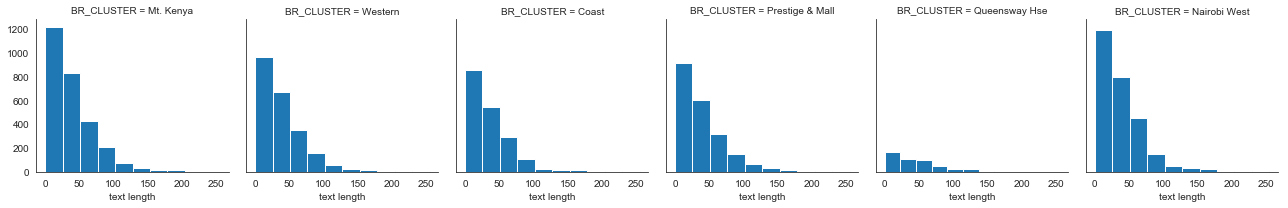

In [90]:
g = sns.FacetGrid(datasetNPS,col='BR_CLUSTER')
g.map(plt.hist,'text length')

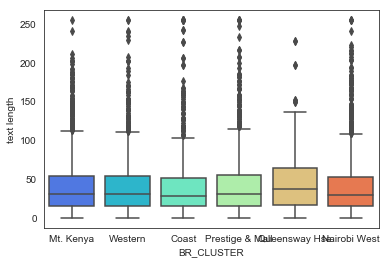

In [91]:
sns.boxplot(x='BR_CLUSTER',y='text length',data=datasetNPS,palette='rainbow')

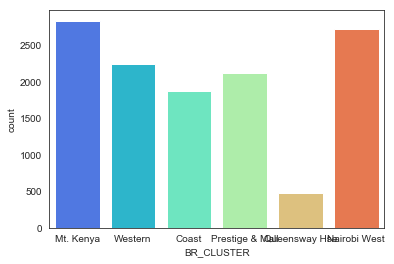

In [92]:
sns.countplot(x='BR_CLUSTER',data=datasetNPS,palette='rainbow')

In [93]:
NPS = datasetNPS.groupby('BR_CLUSTER').mean()
NPS

,BRANCH_CDE,text length
BR_CLUSTER,,
Coast,77.897161,36.030530
Mt. Kenya,62.077221,38.697461
Nairobi West,59.833456,38.051471
Prestige & Mall,66.439924,39.741249
Queensway Hse,84.500000,44.767932
Western,38.799732,38.470562


In [94]:
datasetNPS['NPS - Feedback'].unique()

array(['swap staff after some time to  avoid familiarising with customers as this might lead to fraud ',
       'services are good ',
       'open the business section in case of conjestion at the branch for faster services ',
       ..., 'i cant answer your queries coz i don’t know this number.',
       'am in class call later.', 'busy call later'], dtype=object)

In [95]:
datasetNPS['NPS - Feedback']=datasetNPS['NPS - Feedback'].apply(lambda x: x.split(',,,')[0])

In [96]:
#Expand contractions (Contractions are the shortened versions of words like don’t for do not and how’ll for how will.)
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "don<U+0092>t": "do not ", 
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

#Import re library
import re
re.compile('<title>(.*)</title>')

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
datasetNPS['NPS - Feedback']=datasetNPS['NPS - Feedback'].apply(lambda x:expand_contractions(x))



In [97]:
#Lowercase the NPS - Feedback
datasetNPS['cleaned']=datasetNPS['NPS - Feedback'].apply(lambda x: x.lower())

In [98]:
datasetNPS.loc[datasetNPS['MI_AM_CUST_IDR'] == 141745772]

,MI_AM_CUST_IDR,NAME_CUST_FUL,Customer_Segment,DAT_CUST_OPEN,DAT_BRTH_CUST,REF_PHON_MOB,RM_CDE,SALES_CDE,CDE_CC_BRN_TXN,NME_CC_BRN_TXN,...,Any other feedback,Date,StgTimeStamp,LineageFileName,BRANCH_CDE,BRANCH,BR_CLUSTER,stgtimestamp,text length,cleaned


In [99]:
#Remove digits and words containing digits
datasetNPS['cleaned']=datasetNPS['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [100]:
#Import library
import string

#Remove Punctuations
datasetNPS['cleaned']=datasetNPS['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

In [101]:
# Removing extra spaces
datasetNPS['cleaned']=datasetNPS['cleaned'].apply(lambda x: re.sub(' +',' ',x))

# Preparing Text Data for Exploratory Data Analysis (EDA)

In [102]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

#Add/remove custom stop words with spacy
nlp.vocab["not"].is_stop = False
nlp.vocab["absa"].is_stop = True

# Lemmatization with stopwords removal
datasetNPS['lemmatized']=datasetNPS['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [103]:
datasetNPS.head()

,MI_AM_CUST_IDR,NAME_CUST_FUL,Customer_Segment,DAT_CUST_OPEN,DAT_BRTH_CUST,REF_PHON_MOB,RM_CDE,SALES_CDE,CDE_CC_BRN_TXN,NME_CC_BRN_TXN,...,Date,StgTimeStamp,LineageFileName,BRANCH_CDE,BRANCH,BR_CLUSTER,stgtimestamp,text length,cleaned,lemmatized
0,140000628,JOYCE MWARI MUTEMA,PERSONAL,5/26/1999,5/14/1955,254720419554,2151,BB99999,13,Meru,...,2021-06-30,2021-06-30 09:09:08.863,\\corp.dsarena.com\KE\group\RiskTableau\NPS Da...,13.0,Meru,Mt. Kenya,2021-07-20 04:54:22.940,94,swap staff after some time to avoid familiaris...,swap staff time avoid familiarise customer lea...
1,140002850,EAST ERA AUTO SPARES AND HARDWARE,PERSONAL,4/23/2001,05/11/1998,254746086377,7511,BB99999,4,Embu,...,2021-06-30,2021-06-30 09:09:08.863,\\corp.dsarena.com\KE\group\RiskTableau\NPS Da...,4.0,Embu,Mt. Kenya,2021-07-20 04:54:22.940,18,services are good,service good
2,140004718,ELSA PREPARATORY AND JUNIOR ACADESOLE,PERSONAL,05/10/1999,01/01/1964,254725709293,7573,BB99999,8,Kisii,...,2021-06-30,2021-06-30 09:09:08.863,\\corp.dsarena.com\KE\group\RiskTableau\NPS Da...,18.0,Kisii,Western,2021-07-20 04:54:22.940,82,open the business section in case of conjestio...,open business section case conjestion branch f...
3,140009267,GILBERT ADOGO MARANYA,PERSONAL,2/13/1989,01/01/1958,254733779779,2030,BB99999,16,Nkrumah Rd,...,2021-06-30,2021-06-30 09:09:08.863,\\corp.dsarena.com\KE\group\RiskTableau\NPS Da...,16.0,Nkrumah Rd,Coast,2021-07-20 04:54:22.940,0,,
4,140023851,GEORGE GATHUMBI MWANGI,PERSONAL,6/15/2001,6/22/1962,254722466898,7545,BB99999,49,Lavington,...,2021-06-30,2021-06-30 09:09:08.863,\\corp.dsarena.com\KE\group\RiskTableau\NPS Da...,34.0,Lavington,Prestige & Mall,2021-07-20 04:54:22.940,0,,


In [104]:
#group them according to RM_SEGMENT
datasetNPS_grouped=datasetNPS[['BR_CLUSTER','lemmatized']].groupby(by='BR_CLUSTER').agg(lambda x:' '.join(x))
datasetNPS_grouped.head()

,lemmatized
BR_CLUSTER,
Coast,excellent service poor service prestige close...
Mt. Kenya,swap staff time avoid familiarise customer lea...
Nairobi West,happy service service normally good recom...
Prestige & Mall,customer confidence key branch okay staff ...
Queensway Hse,happy listen bank good service good branch ser...


In [105]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(datasetNPS_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=datasetNPS_grouped.index
df_dtm.head(5)

,aa,aactually,aassist,ab,abc,abit,able,abny,abroad,abs,...,zao,zenu,zenyu,zero,zidisha,ziko,zilikua,zilikuwa,zingine,zote
BR_CLUSTER,,,,,,,,,,,,,,,,,,,,,
Coast,0,1,0,1,0,9,5,0,2,0,...,1,1,2,0,0,4,0,0,1,0
Mt. Kenya,0,0,0,0,0,9,11,0,0,2,...,0,0,2,0,2,3,1,1,4,3
Nairobi West,0,0,0,0,0,5,4,0,0,0,...,1,1,1,0,1,4,0,3,2,2
Prestige & Mall,0,0,1,0,2,3,4,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Queensway Hse,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,2,0,0,0,0,0


In [106]:
#df_dtm.to_excel('df_dtm.xlsx', sheet_name='sheet1', index=True)

In [107]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

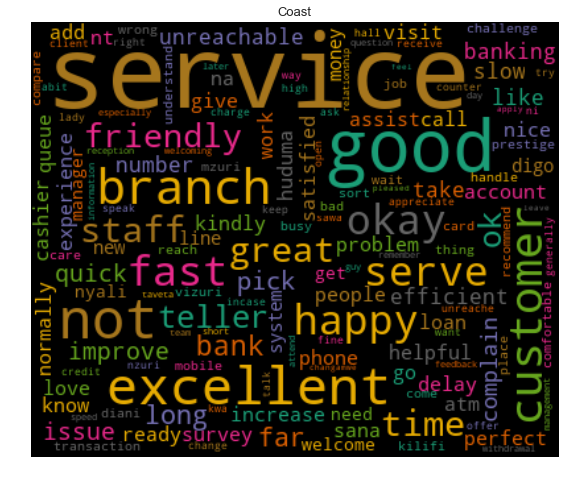

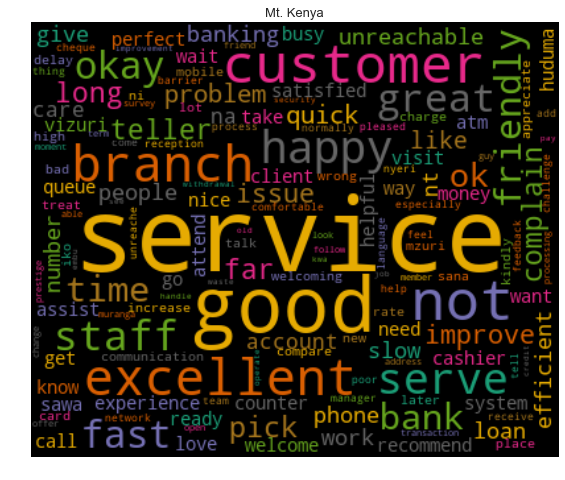

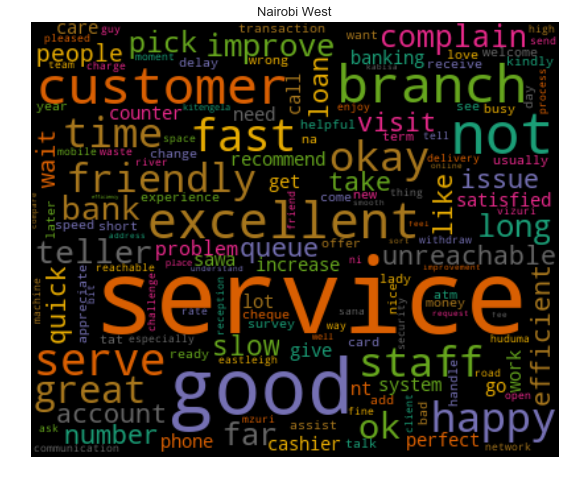

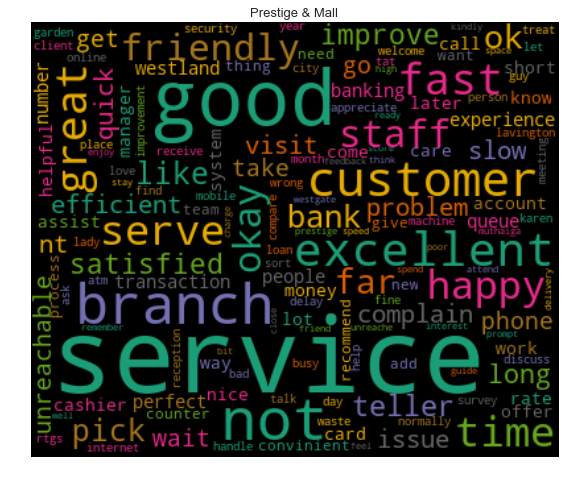

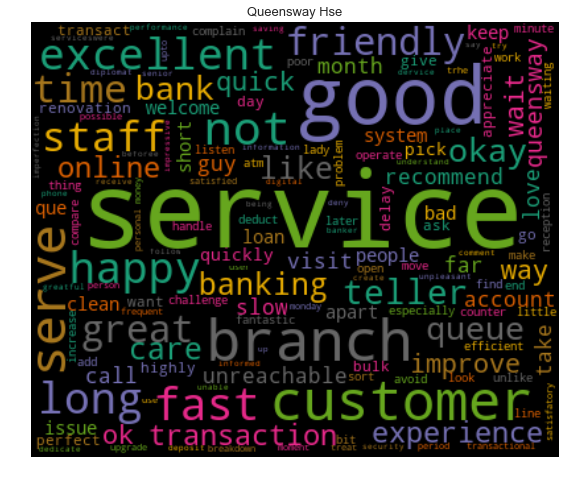

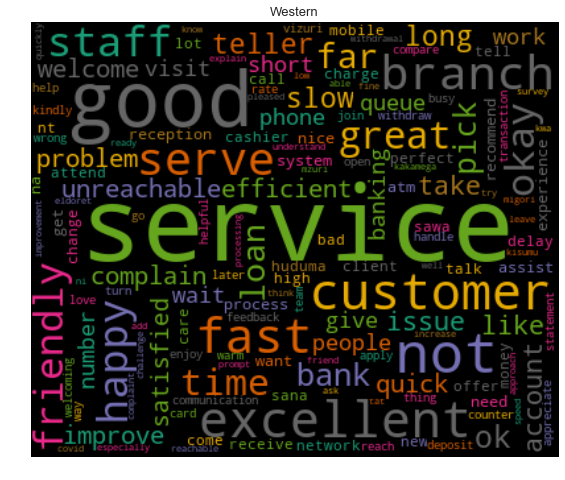

In [108]:
# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each SEGMENT
for index,BR_CLUSTER in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[BR_CLUSTER].sort_values(ascending=False),BR_CLUSTER)

In [109]:
from textblob import TextBlob
datasetNPS['polarity']=datasetNPS['lemmatized'].apply(lambda x:TextBlob(x).sentiment.polarity)


In [110]:
print("3 Random feedback with Highest Polarity:")
for index,review in enumerate(datasetNPS.iloc[datasetNPS['polarity'].sort_values(ascending=False)[:3].index]['NPS - Feedback']):
  print('Review {}:\n'.format(index+1),review)
  


3 Random feedback with Highest Polarity:
Review 1:
 excellent service
Review 2:
 perfect services
Review 3:
 excellent services


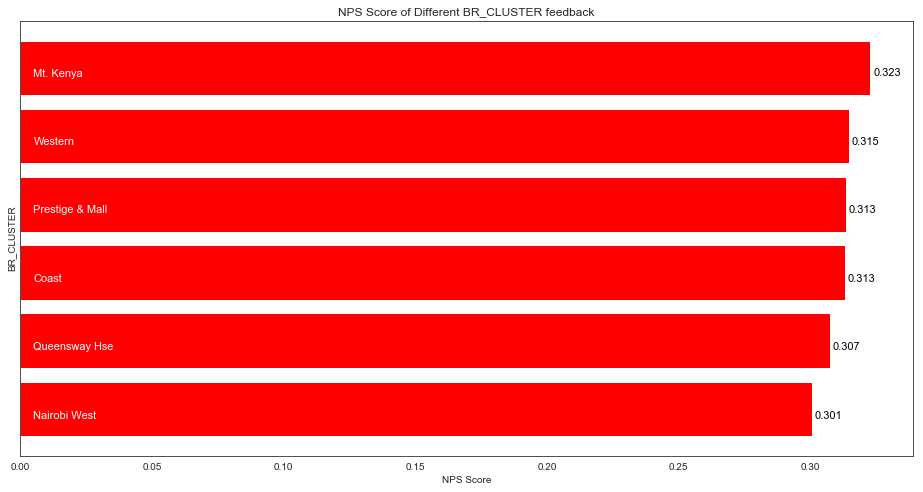

In [111]:
BR_CLUSTER_polarity_sorted=pd.DataFrame(datasetNPS.groupby('BR_CLUSTER')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('NPS Score')
plt.ylabel('BR_CLUSTER')
plt.title('NPS Score of Different BR_CLUSTER feedback')
polarity_graph=plt.barh(np.arange(len(BR_CLUSTER_polarity_sorted.index)),BR_CLUSTER_polarity_sorted['polarity'],color='red',)

# Writing product names on bar
for bar,product in zip(polarity_graph,BR_CLUSTER_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,BR_CLUSTER_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

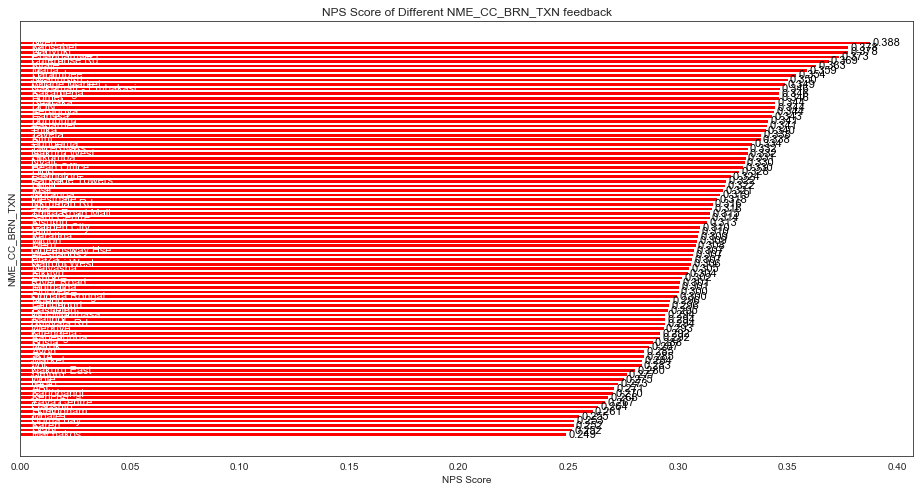

In [112]:
RM_SEGMENT_polarity_sorted=pd.DataFrame(datasetNPS.groupby('NME_CC_BRN_TXN')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('NPS Score')
plt.ylabel('NME_CC_BRN_TXN')
plt.title('NPS Score of Different NME_CC_BRN_TXN feedback')
polarity_graph=plt.barh(np.arange(len(RM_SEGMENT_polarity_sorted.index)),RM_SEGMENT_polarity_sorted['polarity'],color='red',)

# Writing product names on bar
for bar,product in zip(polarity_graph,RM_SEGMENT_polarity_sorted.index):
  plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(product),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,RM_SEGMENT_polarity_sorted['polarity']):
  plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

In [113]:
# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
datasetNPS['scores'] = datasetNPS['lemmatized'].apply(sid.polarity_scores) 

In [114]:
datasetNPS.head()

,MI_AM_CUST_IDR,NAME_CUST_FUL,Customer_Segment,DAT_CUST_OPEN,DAT_BRTH_CUST,REF_PHON_MOB,RM_CDE,SALES_CDE,CDE_CC_BRN_TXN,NME_CC_BRN_TXN,...,LineageFileName,BRANCH_CDE,BRANCH,BR_CLUSTER,stgtimestamp,text length,cleaned,lemmatized,polarity,scores
0,140000628,JOYCE MWARI MUTEMA,PERSONAL,5/26/1999,5/14/1955,254720419554,2151,BB99999,13,Meru,...,\\corp.dsarena.com\KE\group\RiskTableau\NPS Da...,13.0,Meru,Mt. Kenya,2021-07-20 04:54:22.940,94,swap staff after some time to avoid familiaris...,swap staff time avoid familiarise customer lea...,0.0,"{'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound..."
1,140002850,EAST ERA AUTO SPARES AND HARDWARE,PERSONAL,4/23/2001,05/11/1998,254746086377,7511,BB99999,4,Embu,...,\\corp.dsarena.com\KE\group\RiskTableau\NPS Da...,4.0,Embu,Mt. Kenya,2021-07-20 04:54:22.940,18,services are good,service good,0.7,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp..."
2,140004718,ELSA PREPARATORY AND JUNIOR ACADESOLE,PERSONAL,05/10/1999,01/01/1964,254725709293,7573,BB99999,8,Kisii,...,\\corp.dsarena.com\KE\group\RiskTableau\NPS Da...,18.0,Kisii,Western,2021-07-20 04:54:22.940,82,open the business section in case of conjestio...,open business section case conjestion branch f...,0.1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,140009267,GILBERT ADOGO MARANYA,PERSONAL,2/13/1989,01/01/1958,254733779779,2030,BB99999,16,Nkrumah Rd,...,\\corp.dsarena.com\KE\group\RiskTableau\NPS Da...,16.0,Nkrumah Rd,Coast,2021-07-20 04:54:22.940,0,,,0.0,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
4,140023851,GEORGE GATHUMBI MWANGI,PERSONAL,6/15/2001,6/22/1962,254722466898,7545,BB99999,49,Lavington,...,\\corp.dsarena.com\KE\group\RiskTableau\NPS Da...,34.0,Lavington,Prestige & Mall,2021-07-20 04:54:22.940,0,,,0.0,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."


In [115]:
type(datasetNPS['scores'][0])

dict

In [116]:
df1= pd.DataFrame(x for x in datasetNPS['scores'])

In [117]:
datasetNPS = pd.merge(datasetNPS, df1, left_index=True, right_index=True)

In [118]:
datasetNPS.head()

,MI_AM_CUST_IDR,NAME_CUST_FUL,Customer_Segment,DAT_CUST_OPEN,DAT_BRTH_CUST,REF_PHON_MOB,RM_CDE,SALES_CDE,CDE_CC_BRN_TXN,NME_CC_BRN_TXN,...,stgtimestamp,text length,cleaned,lemmatized,polarity,scores,compound,neg,neu,pos
0,140000628,JOYCE MWARI MUTEMA,PERSONAL,5/26/1999,5/14/1955,254720419554,2151,BB99999,13,Meru,...,2021-07-20 04:54:22.940,94,swap staff after some time to avoid familiaris...,swap staff time avoid familiarise customer lea...,0.0,"{'neg': 0.5, 'neu': 0.5, 'pos': 0.0, 'compound...",-0.7184,0.5,0.500,0.000
1,140002850,EAST ERA AUTO SPARES AND HARDWARE,PERSONAL,4/23/2001,05/11/1998,254746086377,7511,BB99999,4,Embu,...,2021-07-20 04:54:22.940,18,services are good,service good,0.7,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,0.0,0.256,0.744
2,140004718,ELSA PREPARATORY AND JUNIOR ACADESOLE,PERSONAL,05/10/1999,01/01/1964,254725709293,7573,BB99999,8,Kisii,...,2021-07-20 04:54:22.940,82,open the business section in case of conjestio...,open business section case conjestion branch f...,0.1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.0,1.000,0.000
3,140009267,GILBERT ADOGO MARANYA,PERSONAL,2/13/1989,01/01/1958,254733779779,2030,BB99999,16,Nkrumah Rd,...,2021-07-20 04:54:22.940,0,,,0.0,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,0.000
4,140023851,GEORGE GATHUMBI MWANGI,PERSONAL,6/15/2001,6/22/1962,254722466898,7545,BB99999,49,Lavington,...,2021-07-20 04:54:22.940,0,,,0.0,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,0.0,0.000,0.000


In [119]:
datasetNPS['Score_BAND'] = np.where(datasetNPS['polarity']> 0.89, 'Promoter', 
                        np.where(datasetNPS['polarity'] > 0.6, 'Passives', 'Detractors'))

In [363]:
datasetNPS.to_excel('datasetNPS.xlsx', sheet_name='sheet1', index=False)

In [120]:
datasetNPS.loc[datasetNPS['MI_AM_CUST_IDR'] == 141745772]

,MI_AM_CUST_IDR,NAME_CUST_FUL,Customer_Segment,DAT_CUST_OPEN,DAT_BRTH_CUST,REF_PHON_MOB,RM_CDE,SALES_CDE,CDE_CC_BRN_TXN,NME_CC_BRN_TXN,...,text length,cleaned,lemmatized,polarity,scores,compound,neg,neu,pos,Score_BAND


In [121]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

#Add/remove custom stop words with spacy
#nlp.vocab["not"].is_stop = False
nlp.vocab["absa"].is_stop = True

# Lemmatization with stopwords removal
datasetNPS['lemmatized']=datasetNPS['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [122]:
#group them according to RM_SEGMENT
datasetNPS_grouped=datasetNPS[['Score_BAND','lemmatized']].groupby(by='Score_BAND').agg(lambda x:' '.join(x))
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(datasetNPS_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=datasetNPS_grouped.index
df_dtm.head(5)

,aa,aactually,aassist,ab,abc,abit,able,abny,abroad,abs,...,zenu,zenyu,zero,zidisha,ziko,zilikua,zilikuwa,zingine,zoom,zote
Score_BAND,,,,,,,,,,,,,,,,,,,,,
Detractors,1,0,1,1,5,32,32,0,2,0,...,2,6,0,9,14,1,7,8,1,5
Passives,0,1,0,0,2,0,4,1,0,0,...,0,0,1,0,1,0,0,0,0,0
Promoter,0,0,0,0,2,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0


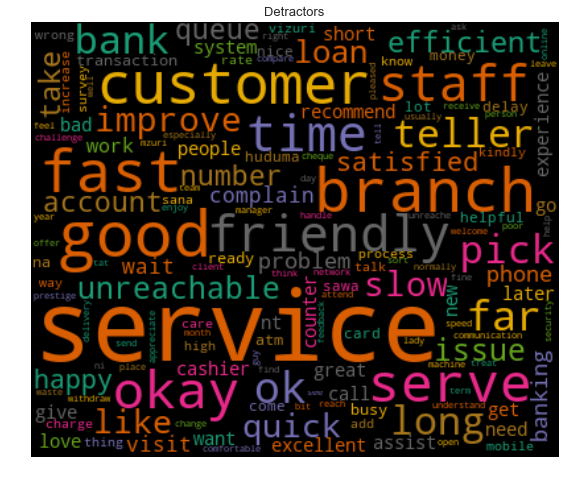

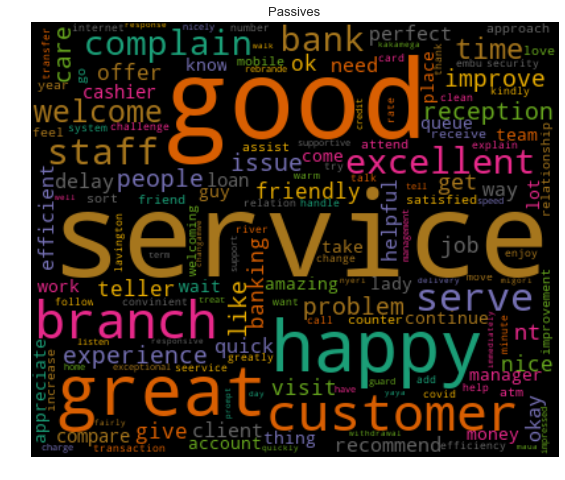

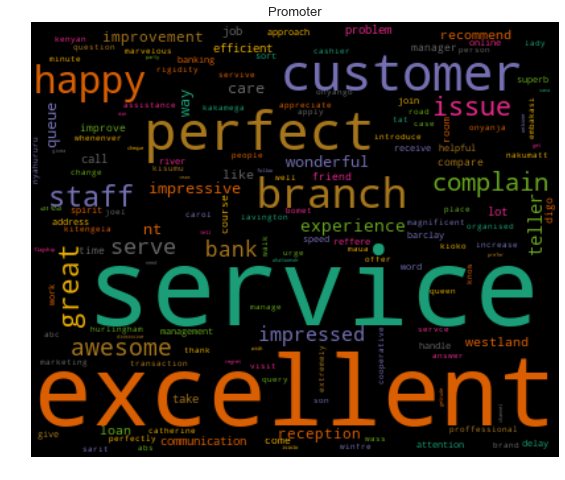

In [123]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()
  
# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each SEGMENT
for index,Score_BAND in enumerate(df_dtm.columns):
  generate_wordcloud(df_dtm[Score_BAND].sort_values(ascending=False),Score_BAND)

In [124]:
#group them according to RM_SEGMENT
datasetNPS_grouped=datasetNPS[['Date','BR_CLUSTER','NME_CC_BRN_TXN','Score_BAND','lemmatized']].groupby(['Date','BR_CLUSTER','NME_CC_BRN_TXN','Score_BAND']).agg(lambda x:' '.join(x))
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(datasetNPS_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=datasetNPS_grouped.index
df_dtm.head(5)

aa  aactually  aassist  ab  \
Date       BR_CLUSTER NME_CC_BRN_TXN Score_BAND                               
2021-01-31 Coast      Changamwe      Detractors   0          0        0   0   
                                     Passives     0          0        0   0   
                                     Promoter     0          0        0   0   
                      Diani          Detractors   0          0        0   0   
                                     Promoter     0          0        0   0   

                                                 abc  abit  able  abny  \
Date       BR_CLUSTER NME_CC_BRN_TXN Score_BAND                          
2021-01-31 Coast      Changamwe      Detractors    0     0     0     0   
                                     Passives      0     0     0     0   
                                     Promoter      0     0     0     0   
                      Diani          Detractors    0     0     0     0   
                                     Promoter      0     0     0     0   

                                                 abroad  abs  ...  zao  zenu  \
Date       BR_CLUSTER NME_CC_BRN_TXN Score_BAND               ...              
2021-01-31 Coast      Changamwe      Detractors       0    0  ...    0     0   
                                     Passives         0    0  ...    0     0   
                                     Promoter         0    0  ...    0     0   
                      Diani          Detractors       0    0  ...    0     0   
                                     Promoter         0    0  ...    0     0   

                                                 zenyu  zero  zidisha  ziko  \
Date       BR_CLUSTER NME_CC_BRN_TXN Score_BAND                               
2021-01-31 Coast      Changamwe      Detractors      0     0        0     0   
                                     Passives        0     0        0     0   
                                     Promoter        0     0        0     0   
                      Diani          Detractors      0     0        0     0   
                                     Promoter        0     0        0     0   

                                                 zilikua  zilikuwa  zingine  \
Date       BR_CLUSTER NME_CC_BRN_TXN Score_BAND                               
2021-01-31 Coast      Changamwe      Detractors        0         0        0   
                                     Passives          0         0        0   
                                     Promoter          0         0        0   
                      Diani          Detractors        0         0        0   
                                     Promoter          0         0        0   

                                                 zote  
Date       BR_CLUSTER NME_CC_BRN_TXN Score_BAND        
2021-01-31 Coast      Changamwe      Detractors     0  
                                     Passives       0  
                                     Promoter       0  
                      Diani          Detractors     0  
                                     Promoter       0  

[5 rows x 2887 columns]

In [125]:
df_dtm.head(5)

aa  aactually  aassist  ab  \
Date       BR_CLUSTER NME_CC_BRN_TXN Score_BAND                               
2021-01-31 Coast      Changamwe      Detractors   0          0        0   0   
                                     Passives     0          0        0   0   
                                     Promoter     0          0        0   0   
                      Diani          Detractors   0          0        0   0   
                                     Promoter     0          0        0   0   

                                                 abc  abit  able  abny  \
Date       BR_CLUSTER NME_CC_BRN_TXN Score_BAND                          
2021-01-31 Coast      Changamwe      Detractors    0     0     0     0   
                                     Passives      0     0     0     0   
                                     Promoter      0     0     0     0   
                      Diani          Detractors    0     0     0     0   
                                     Promoter      0     0     0     0   

                                                 abroad  abs  ...  zao  zenu  \
Date       BR_CLUSTER NME_CC_BRN_TXN Score_BAND               ...              
2021-01-31 Coast      Changamwe      Detractors       0    0  ...    0     0   
                                     Passives         0    0  ...    0     0   
                                     Promoter         0    0  ...    0     0   
                      Diani          Detractors       0    0  ...    0     0   
                                     Promoter         0    0  ...    0     0   

                                                 zenyu  zero  zidisha  ziko  \
Date       BR_CLUSTER NME_CC_BRN_TXN Score_BAND                               
2021-01-31 Coast      Changamwe      Detractors      0     0        0     0   
                                     Passives        0     0        0     0   
                                     Promoter        0     0        0     0   
                      Diani          Detractors      0     0        0     0   
                                     Promoter        0     0        0     0   

                                                 zilikua  zilikuwa  zingine  \
Date       BR_CLUSTER NME_CC_BRN_TXN Score_BAND                               
2021-01-31 Coast      Changamwe      Detractors        0         0        0   
                                     Passives          0         0        0   
                                     Promoter          0         0        0   
                      Diani          Detractors        0         0        0   
                                     Promoter          0         0        0   

                                                 zote  
Date       BR_CLUSTER NME_CC_BRN_TXN Score_BAND        
2021-01-31 Coast      Changamwe      Detractors     0  
                                     Passives       0  
                                     Promoter       0  
                      Diani          Detractors     0  
                                     Promoter       0  

[5 rows x 2887 columns]

In [371]:
df_dtm.to_excel('Branchdf_dtm.xlsx', sheet_name='sheet1', index=True)

In [126]:
# Transposing document term matrix
df_dtm=df_dtm.transpose()

In [127]:
datasetNPS_grouped=datasetNPS[['Date','BR_CLUSTER','NME_CC_BRN_TXN','Score_BAND','lemmatized']].groupby(['Date','BR_CLUSTER','NME_CC_BRN_TXN','Score_BAND']).agg(lambda x:' '.join(x)).reset_index()

# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(datasetNPS_grouped['lemmatized'])
dfindex = datasetNPS_grouped.drop(columns = ['lemmatized',])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm = dfindex.join(df_dtm)

df_dtm.head(5)

,Date,BR_CLUSTER,NME_CC_BRN_TXN,Score_BAND,aa,aactually,aassist,ab,abc,abit,...,zao,zenu,zenyu,zero,zidisha,ziko,zilikua,zilikuwa,zingine,zote
0,2021-01-31,Coast,Changamwe,Detractors,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-01-31,Coast,Changamwe,Passives,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-01-31,Coast,Changamwe,Promoter,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-01-31,Coast,Diani,Detractors,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-01-31,Coast,Diani,Promoter,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
# Transposing document term matrix
df_dtm=df_dtm.transpose()
df_dtm.to_excel('Branchdf_dtm.xlsx', sheet_name='sheet1', index=True)

In [129]:
datasetNPS["Dates"] = pd.to_datetime(datasetNPS["Date"])
datasetNPS["Date"] = datasetNPS["Dates"].dt.strftime('%d%m%Y')

In [139]:
datasetNPS["Combined"] = datasetNPS["Date"] +'_'+ datasetNPS["BR_CLUSTER"] +'_'+ datasetNPS["NME_CC_BRN_TXN"] +'_'+ datasetNPS["Score_BAND"]

In [141]:
#group them according to RM_SEGMENT
datasetNPS_grouped=datasetNPS[['Combined','lemmatized']].groupby(['Combined']).agg(lambda x:' '.join(x))
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(datasetNPS_grouped['lemmatized'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=datasetNPS_grouped.index
sdf_dtm = df_dtm.stack(level=-1).reset_index()
sdf_dtm[['Month','BR_CLUSTER','NME_CC_BRN_TXN','Score_BAND']] = sdf_dtm['Combined'].str.split('_',expand=True)
sdf_dtm = sdf_dtm.drop(columns = ['Combined',])
sdf_dtm = sdf_dtm.rename(columns = {'level_1': 'Words', 0 : 'Count'}, inplace = False)
sdf_dtm.head(5)

,Words,Count,Month,BR_CLUSTER,NME_CC_BRN_TXN,Score_BAND
0,aa,0,28022021,Coast,Changamwe,Detractors
1,aactually,0,28022021,Coast,Changamwe,Detractors
2,aassist,0,28022021,Coast,Changamwe,Detractors
3,ab,0,28022021,Coast,Changamwe,Detractors
4,abc,0,28022021,Coast,Changamwe,Detractors


In [142]:
sdf_dtm.to_excel('Branchsdf_dtm.xlsx', sheet_name='sheet1', index=True)

In [143]:
sdf_dtm.tail(5)

,Words,Count,Month,BR_CLUSTER,NME_CC_BRN_TXN,Score_BAND
3706903,ziko,0,31052021,Western,Webuye,Promoter
3706904,zilikua,0,31052021,Western,Webuye,Promoter
3706905,zilikuwa,0,31052021,Western,Webuye,Promoter
3706906,zingine,0,31052021,Western,Webuye,Promoter
3706907,zote,0,31052021,Western,Webuye,Promoter
